In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,precision_score,roc_curve
# import seaborn as sns
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from model import save_model

## Load data

In [18]:
df= pd.read_csv('dataset.csv')
df = shuffle(df,random_state=42)

sym_des = pd.read_csv('symptom_Description.csv')
sym_pre = pd.read_csv('symptom_precaution.csv')
df1 = pd.read_csv('Symptom-severity.csv')

## Processing data

### Main table

In [19]:
for col in df.columns:
    df[col] = df[col].str.replace('_',' ')

In [20]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

In [21]:
df = df.fillna(0)

## Increasing/reducing  the dataset

In [22]:
df[df.Disease == 'Acne']

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
72,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
135,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
191,Acne,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4616,Acne,skin rash,pus filled pimples,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4824,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4843,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df = df.drop_duplicates()

### Processing severity/LE

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')

In [26]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin rash,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Acne,skin rash,pus filled pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hyperthyroidism,fatigue,mood swings,weight loss,restlessness,sweating,diarrhoea,fast heart rate,excessive hunger,muscle weakness,irritability,abnormal menstruation,0,0,0,0,0,0
3,AIDS,muscle wasting,patches in throat,high fever,extra marital contacts,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Chronic cholestasis,itching,vomiting,yellowish skin,nausea,loss of appetite,abdominal pain,yellowing of eyes,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,Osteoarthristis,joint pain,neck pain,knee pain,hip joint pain,swelling joints,0,0,0,0,0,0,0,0,0,0,0,0
2726,Typhoid,chills,vomiting,fatigue,high fever,headache,nausea,constipation,abdominal pain,diarrhoea,belly pain,0,0,0,0,0,0,0
2792,Chicken pox,itching,skin rash,fatigue,lethargy,high fever,headache,loss of appetite,mild fever,malaise,red spots over body,0,0,0,0,0,0,0
3042,Migraine,acidity,indigestion,headache,blurred and distorted vision,excessive hunger,stiff neck,depression,irritability,0,0,0,0,0,0,0,0,0


In [27]:
df1

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5
...,...,...
128,inflammatory nails,2
129,blister,4
130,red sore around nose,2
131,yellow crust ooze,3


In [28]:
vals = df
# find unique symptom
unique_symptom = set()
for col in df.columns[1:]:
    unique_symptom = unique_symptom.union(set(df[col].unique()))
    
unique_symptom = list(unique_symptom)
# symptoms = df1['Symptom'].unique()
le = LabelEncoder()
le.fit(unique_symptom)

encoder_dict = dict(
                    zip(
                            le.classes_,
                            le.transform(le.classes_)
                        )
                    )

# vals
for feature in vals.columns[1:]:
    vals[feature] = vals[feature].apply(
                                        lambda value: encoder_dict.get(value, -9**10)
                                        )


## Train RandomForest

In [29]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(243, 17) (61, 17) (243,) (61,)


[        122          45         125 -3486784401 -3486784401 -3486784401
 -3486784401 -3486784401 -3486784401 -3486784401 -3486784401 -3486784401
 -3486784401 -3486784401 -3486784401 -3486784401 -3486784401]
Paralysis (brain hemorrhage)
F1-score% = 86.46074646074645 | Accuracy% = 86.88524590163934


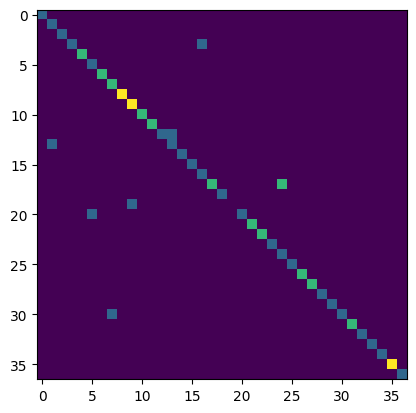

In [37]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
print(x_test[0])
print(preds[0])
conf_mat = confusion_matrix(y_test, preds)
plt.imshow(conf_mat)
# df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

In [38]:
inputs = ['continuous_sneezing', 'chills', 'fatigue',
       'cough', 'high_fever', 'headache', ' swelled_lymph_nodes',
       'malaise', 'phlegm', 'throat_irritation', 'redness_of_eyes',
       'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain',
       'loss_of_smell', 'muscle_pain']

In [39]:
inputs = [encoder_dict.get(sym, -9**10) for sym in inputs]

In [40]:
rnd_forest.predict([inputs])

array(['Migraine'], dtype=object)

## Save model

In [41]:
save_model({'model': rnd_forest}, "model_predict_1.pkl")